In [11]:
import rdkit.Chem as rkc
from rdkit.Chem import Crippen
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors, QED
from rdkit.Chem.QED import properties
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append(r"D:\conda\envs\my-rdkit-env\ARA2B_antagonists_molecular_library-master\molecules_filters\SA_Score")
import sascorer as sa

In [12]:
filename = r'D:\Research\A2B\training\validation\model60_vali_standrad.smi'    #read *.smi file
with open(filename,'r+') as load_smi:
    smi_li = load_smi.read().split('\n')

mols = [rkc.MolFromSmiles(smi) for smi in smi_li]

In [13]:
filename_2 = r'D:\Research\A2B\training\validation\chembl_validation_standrad.smi'    #read *.smi file
with open(filename_2,'r+') as load_smi:
    smi_li2 = load_smi.read().split('\n')

mols_2 = [rkc.MolFromSmiles(smi) for smi in smi_li2]

In [23]:
filename_3 = r'D:\Research\A2B\training\validation\drd2_validation_standrad.smi'    #read *.smi file
with open(filename_3,'r+') as load_smi:
    smi_li3 = load_smi.read().split('\n')

mols_3 = [rkc.MolFromSmiles(smi) for smi in smi_li3]

In [15]:
def QED_calculation(mol): #Calculate for QED score
    return QED.default(mol)

def SAscore_calculation(mol): #Calculate for SA score
    try:
        return sa.calculateScore(mol)
    except ZeroDivisionError:
            pass
        
def Lipinski_judgment(mol): #Lipinski's Rule 
    num_hdonors = Lipinski.NumHDonors(mol)
    num_hacceptors = Lipinski.NumHAcceptors(mol)
    num_rotatable = Lipinski.NumRotatableBonds(mol)
    mol_weight = Descriptors.MolWt(mol)
    mol_logp = Crippen.MolLogP(mol)
    mol_TPSA = Descriptors.TPSA(mol)
    if num_hdonors < 5 and num_hacceptors > 4 and mol_weight > 250 and mol_logp > 1.5 and mol_TPSA >50 and mol_TPSA < 120:
        return 'Y'
    else:
        return 'N'

In [24]:
#qed_value_1,qed_value_2,qed_value_3, = [QED_calculation(mol) for mol in mols],[QED_calculation(mol) for mol in mols_2],[QED_calculation(mol) for mol in mols_3]
sa_value_1,sa_value_2,sa_value_3 = [SAscore_calculation(mol) for mol in mols],[SAscore_calculation(mol) for mol in mols_2],[SAscore_calculation(mol) for mol in mols_3]
MW_1,MW_2,MW_3= [Descriptors.MolWt(mol) for mol in mols], [Descriptors.MolWt(mol) for mol in mols_2],[Descriptors.MolWt(mol) for mol in mols_3]
cLgP_1,cLgP_2,cLgP_3= [Crippen.MolLogP(mol) for mol in mols], [Crippen.MolLogP(mol) for mol in mols_2],[Crippen.MolLogP(mol) for mol in mols_3]

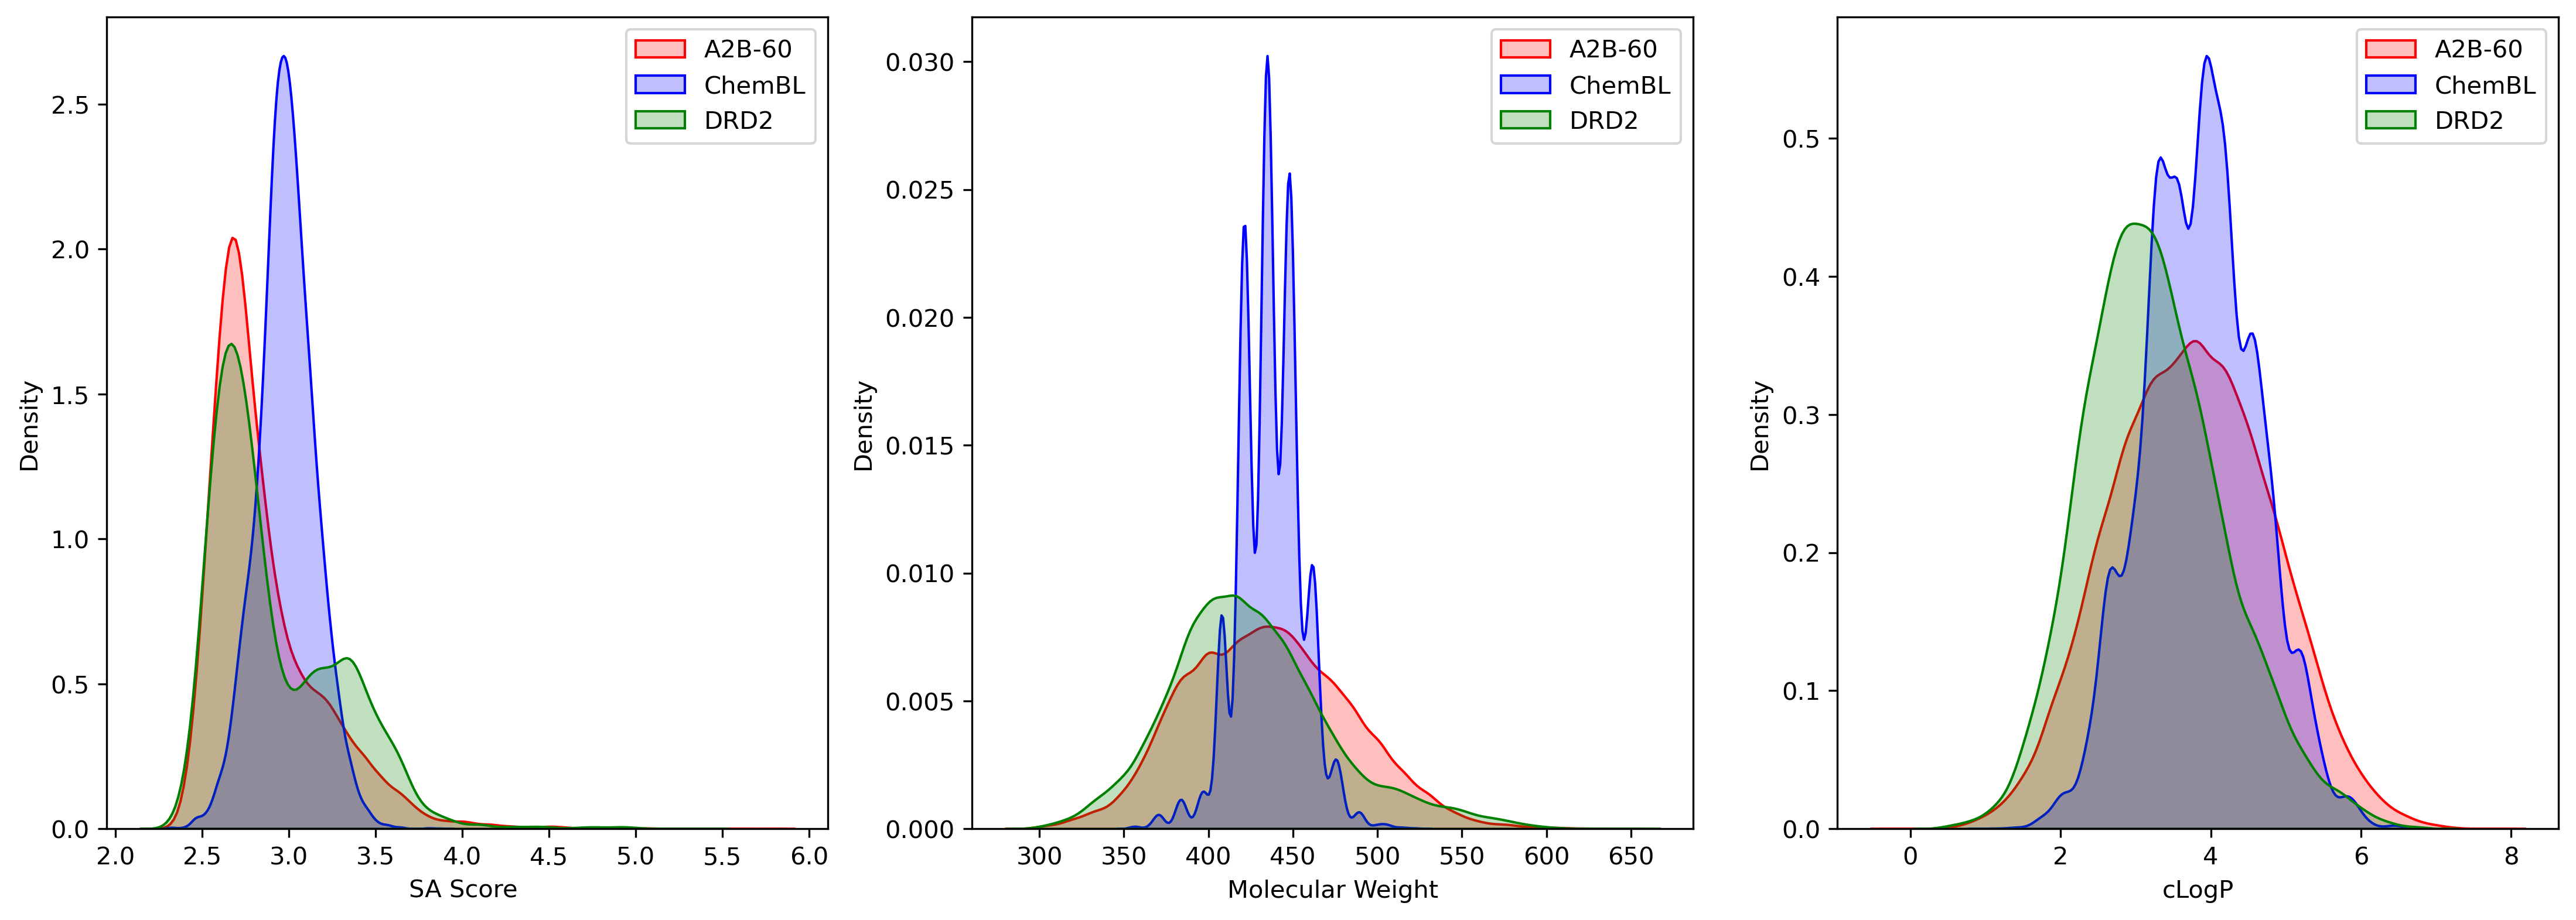

In [26]:
fig, axes = plt.subplots(1, 3,figsize=(18,6),dpi=300)

plt.subplot(1,3,1)
sns.kdeplot(data=sa_value_1, color='r', fill=True)
sns.kdeplot(data=sa_value_2, color='b', fill=True)
sns.kdeplot(data=sa_value_3, color='g', fill=True)
plt.legend(loc='best',labels=['A2B-60','ChemBL','DRD2'])
plt.xlabel("SA Score ")

plt.subplot(1,3,2)
sns.kdeplot(data=MW_1, color='r', fill=True)
sns.kdeplot(data=MW_2, color='b', fill=True)
sns.kdeplot(data=MW_3, color='g', fill=True)
plt.legend(loc='best',labels=['A2B-60','ChemBL','DRD2'])
plt.xlabel("Molecular Weight")

plt.subplot(1,3,3)
sns.kdeplot(data=cLgP_1, color='r', fill=True)
sns.kdeplot(data=cLgP_2, color='b', fill=True)
sns.kdeplot(data=cLgP_3, color='g', fill=True)
plt.legend(loc='best',labels=['A2B-60','ChemBL','DRD2'])
plt.xlabel("cLogP")

plt.show()